We will use `matplotlib.pyplot` for plotting and scipy's netcdf package for reading the model output. The `%pylab inline` causes figures to appear in the page and conveniently alias pyplot to `plt` (which is becoming a widely used alias).

This analysis assumes you changed `DAYMAX` to some multiple of 5 so that there are multiple time records in the model output.

To see this notebook with figures, see https://gist.github.com/adcroft/2a2b91d66625fd534372.

In [1]:
%matplotlib inline

In [10]:
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.rc('figure', figsize=(6, 4.5))
mpl.rcParams['font.size'] = 10
mpl.rcParams['figure.dpi'] = 150
mpl.rcParams['figure.facecolor'] = 'w'
mpl.rcParams['hatch.linewidth'] = 0.5
mpl.rcParams['hatch.color'] = '0.25'

import xarray as xr

import ipywidgets


We first create a netcdf object, or "handle", to the netcdf file. We'll also list all the objects in the netcdf object.

In [3]:
prog = xr.open_dataset('prog__0001_006.nc')
prog

<xarray.Dataset>
Dimensions:  (Time: 8, xh: 44, xq: 45, yh: 40, yq: 41, zi: 3, zl: 2)
Coordinates:
  * xq       (xq) float64 0.0 0.5 1.0 1.5 2.0 2.5 ... 20.0 20.5 21.0 21.5 22.0
  * yh       (yh) float64 30.25 30.75 31.25 31.75 ... 48.25 48.75 49.25 49.75
  * zl       (zl) float64 1.035e+03 1.036e+03
  * Time     (Time) object 0001-01-06 00:00:00 ... 0001-02-10 00:00:00
  * xh       (xh) float64 0.25 0.75 1.25 1.75 2.25 ... 20.25 20.75 21.25 21.75
  * yq       (yq) float64 30.0 30.5 31.0 31.5 32.0 ... 48.0 48.5 49.0 49.5 50.0
  * zi       (zi) float64 1.034e+03 1.036e+03 1.037e+03
Data variables:
    u        (Time, zl, yh, xq) float32 ...
    v        (Time, zl, yq, xh) float32 ...
    h        (Time, zl, yh, xh) float64 ...
    e        (Time, zi, yh, xh) float32 ...
Attributes:
    NumFilesInSet:  1
    title:          MOM Experiment
    grid_type:      regular
    grid_tile:      N/A

"e" is 4-dimensional. netcdf files and objects are index [n,k,j,i] for the time-, vertical-, meridional-, zonal-axes.

Let's take a quick look at the first record [n=0] of the top interface [k=0]. 

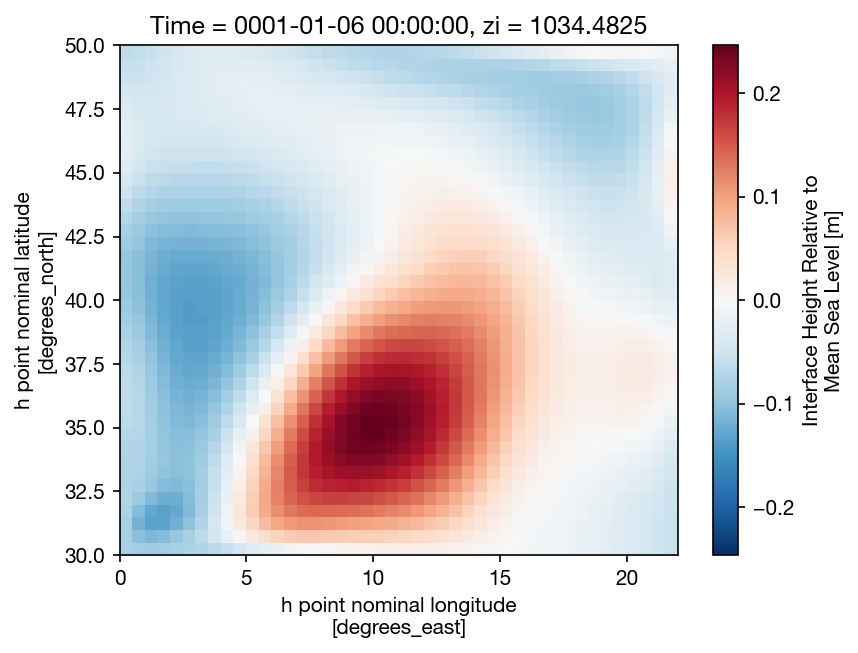

In [9]:
pc = prog.e.isel(Time=0, zi=0).plot()

In [17]:
geom = xr.open_dataset('ocean_geometry.nc')
geom

<xarray.Dataset>
Dimensions:  (lath: 40, latq: 41, lonh: 44, lonq: 45)
Coordinates:
  * lath     (lath) float64 30.25 30.75 31.25 31.75 ... 48.25 48.75 49.25 49.75
  * lonh     (lonh) float64 0.25 0.75 1.25 1.75 2.25 ... 20.25 20.75 21.25 21.75
  * latq     (latq) float64 30.0 30.5 31.0 31.5 32.0 ... 48.5 49.0 49.5 50.0
  * lonq     (lonq) float64 0.0 0.5 1.0 1.5 2.0 2.5 ... 20.0 20.5 21.0 21.5 22.0
Data variables: (12/19)
    geolatb  (latq, lonq) float64 ...
    geolonb  (latq, lonq) float64 ...
    geolat   (lath, lonh) float64 ...
    geolon   (lath, lonh) float64 ...
    D        (lath, lonh) float64 ...
    f        (latq, lonq) float64 ...
    ...       ...
    dyBu     (latq, lonq) float64 ...
    Ah       (lath, lonh) float64 ...
    Aq       (latq, lonq) float64 ...
    dxCvo    (latq, lonh) float64 ...
    dyCuo    (lath, lonq) float64 ...
    wet      (lath, lonh) float64 ...
Attributes:
    filename:  ./ocean_geometry.nc

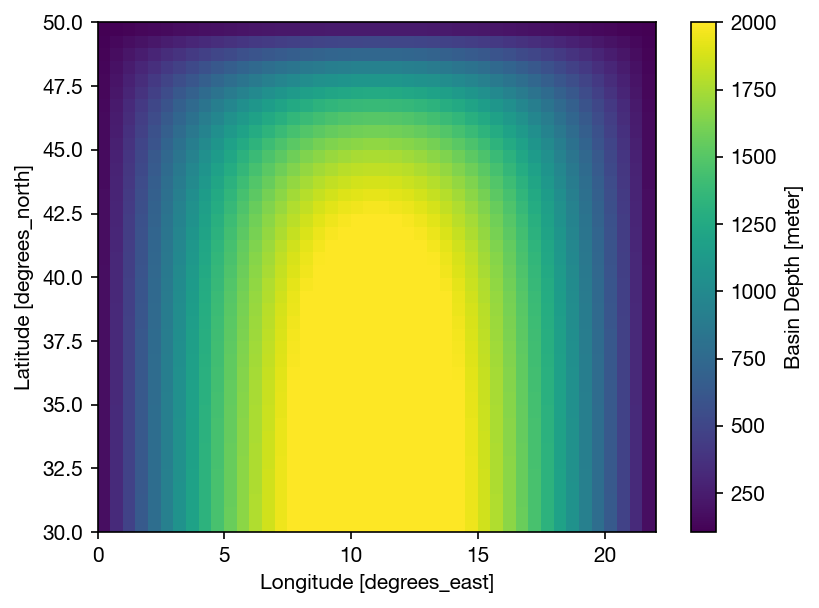

In [18]:
geom.D.plot()

In [19]:
stats = xr.open_dataset('ocean.stats.nc')
stats

<xarray.Dataset>
Dimensions:        (Interface: 3, Layer: 2, Time: 41)
Coordinates:
  * Layer          (Layer) float64 1.035e+03 1.036e+03
  * Interface      (Interface) float64 1.034e+03 1.036e+03 1.037e+03
  * Time           (Time) timedelta64[ns] 0 days 1 days ... 39 days 40 days
Data variables:
    Ntrunc         (Time) float64 ...
    En             (Time) float64 ...
    APE            (Time, Interface) float64 ...
    KE             (Time, Layer) float64 ...
    H0             (Time, Interface) float64 ...
    Mass_lay       (Time, Layer) float64 ...
    Mass           (Time) float64 ...
    Mass_chg       (Time) float64 ...
    Mass_anom      (Time) float64 ...
    max_CFL_trans  (Time) float64 ...
    max_CFL_lin    (Time) float64 ...
Attributes:
    filename:  ./ocean.stats.nc

In [20]:
cont = xr.open_dataset('cont__0001_003.nc')
cont

/Users/cwolfe/miniconda3/envs/cartopy/lib/python3.7/site-packages/xarray/coding/times.py:527: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Users/cwolfe/miniconda3/envs/cartopy/lib/python3.7/site-packages/numpy/core/_asarray.py:102: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


<xarray.Dataset>
Dimensions:     (Time: 8, nv: 2, xh: 44, xq: 45, yh: 40, yq: 41, zl: 2)
Coordinates:
  * xq          (xq) float64 0.0 0.5 1.0 1.5 2.0 ... 20.0 20.5 21.0 21.5 22.0
  * yh          (yh) float64 30.25 30.75 31.25 31.75 ... 48.25 48.75 49.25 49.75
  * zl          (zl) float64 1.035e+03 1.036e+03
  * Time        (Time) object 0001-01-03 12:00:00 ... 0001-02-07 12:00:00
  * nv          (nv) float64 1.0 2.0
  * xh          (xh) float64 0.25 0.75 1.25 1.75 ... 20.25 20.75 21.25 21.75
  * yq          (yq) float64 30.0 30.5 31.0 31.5 32.0 ... 48.5 49.0 49.5 50.0
Data variables:
    uh          (Time, zl, yh, xq) float32 ...
    vh          (Time, zl, yq, xh) float32 ...
    average_T1  (Time) object ...
    average_T2  (Time) object ...
    average_DT  (Time) timedelta64[ns] ...
    Time_bnds   (Time, nv) timedelta64[ns] ...
Attributes:
    NumFilesInSet:  1
    title:          MOM Experiment
    grid_type:      regular
    grid_tile:      N/A

In [22]:
xr.open_dataset('Vertical_coordinate.nc')

<xarray.Dataset>
Dimensions:  (Layer: 2)
Coordinates:
  * Layer    (Layer) float64 1.035e+03 1.036e+03
Data variables:
    R        (Layer) float64 ...
    g        (Layer) float64 ...
Attributes:
    filename:  ./Vertical_coordinate.nc

The data looks OKish. No scale! And see that "`<matplotlib...>`" line? That's a handle returned by the matplotlib function. Hide it with a semicolon. Let's add a scale and change the colormap.

We have 4D data but can only visualize by projecting on a 2D medium (the page). Let's solve that by going interactive!

In [12]:
prog.e.isel(zi=0).max()

<xarray.DataArray 'e' ()>
array(0.49357793, dtype=float32)
Coordinates:
    zi       float64 1.034e+03

In [14]:
prog.e.isel(zi=0).min()

<xarray.DataArray 'e' ()>
array(-0.27187294, dtype=float32)
Coordinates:
    zi       float64 1.034e+03

We'll need to know the range to fix the color scale...

We define a simple function that takes the record number as an argument and then plots the top interface (k=0) for that record. We then use the `interact()` function to do some magic!

In [16]:
def plot_ssh(record):
    prog.e.isel(Time=record, zi=0).plot(vmin=-.5, vmax=.5, cmap='RdBu_r')
    plt.show()

ipywidgets.interact(plot_ssh, record=(0,len(prog.Time)-1,1));

interactive(children=(IntSlider(value=3, description='record', max=7), Output()), _dom_classes=('widget-intera…

Unable to scroll the slider steadily enough? We'll use a loop to redraw for us...